<a href="https://colab.research.google.com/github/Im-LAKSH/TreeSpecies/blob/main/TreeSpecies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

dataset_path = "/content/drive/MyDrive/Tree_Species_Dataset"

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

class_names = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])
print("Classes:", class_names)

Classes: ['.git', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [ ]:
for cls in class_names:
    class_dir = os.path.join(dataset_path, cls)
    img_count = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    print(f"{cls}: {img_count}")

.git: 0
amla: 50
asopalav: 50
babul: 50
bamboo: 50
banyan: 50
bili: 50
cactus: 50
champa: 50
coconut: 50
garmalo: 50
gulmohor: 50
gunda: 50
jamun: 50
kanchan: 50
kesudo: 50
khajur: 50
mango: 50
motichanoti: 50
neem: 50
nilgiri: 50
other: 150
pilikaren: 50
pipal: 50
saptaparni: 50
shirish: 50
simlo: 50
sitafal: 50
sonmahor: 50
sugarcane: 50
vad: 50


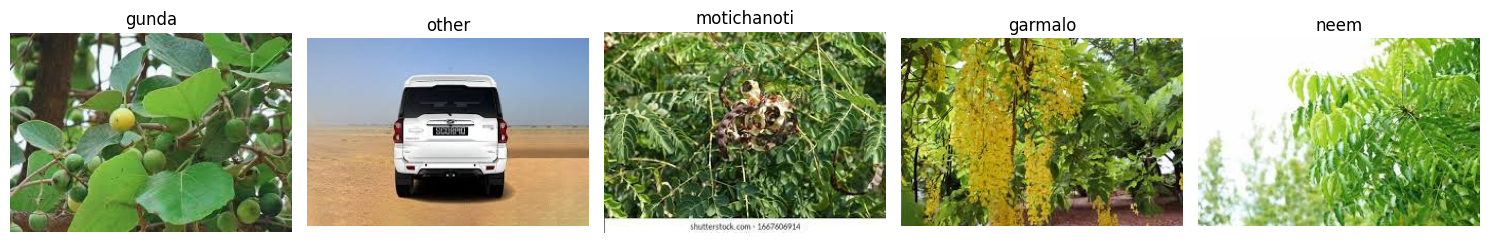

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(5):
    random_class = random.choice(class_names)
    img_list = os.listdir(os.path.join(dataset_path, random_class))
    img_name = random.choice(img_list)
    img_path = os.path.join(dataset_path, random_class, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(random_class)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
!git clone https://github.com/Im-LAKSH/TreeSpecies.git


Cloning into 'TreeSpecies'...
remote: Enumerating objects: 1602, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 1602 (delta 11), reused 10 (delta 3), pack-reused 1570 (from 1)
Receiving objects: 100% (1602/1602), 90.20 MiB | 30.59 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Encountered 1 file(s) that should have been pointers, but weren't:
	tree_species_model.h5


In [ ]:
import os

repo_path = "TreeSpecies/Tree_Species_Dataset"
print("Contents:", os.listdir(repo_path))

Contents: ['asopalav', 'champa', 'saptaparni', 'other', 'mango', 'vad', 'bili', 'shirish', 'sonmahor', 'jamun', 'khajur', 'nilgiri', 'cactus', 'sugarcane', 'kanchan', 'gulmohor', 'kesudo', 'banyan', 'pilikaren', 'babul', 'gunda', 'neem', 'sitafal', 'motichanoti', 'garmalo', 'coconut', 'bamboo', 'pipal', 'amla', 'simlo']


In [ ]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")


Number of classes: 30


In [ ]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")


Total images: 1600


In [ ]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)


            Image Count
other               150
asopalav             50
champa               50
saptaparni           50
mango                50
shape:  (30, 1)


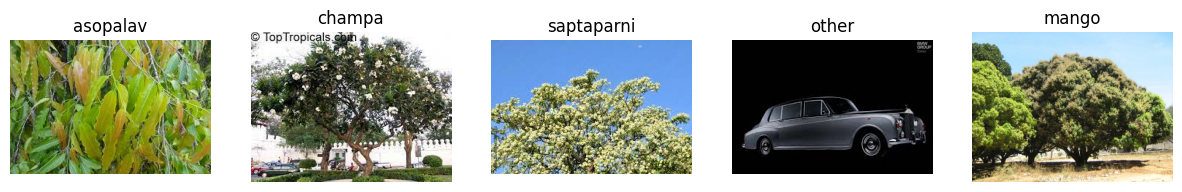

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)


In [ ]:
image_shapes = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        img = Image.open(img_path)
        image_shapes.append(img.size)

# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

,Width,Height
0,275,183
1,225,225
2,203,248
3,254,198
4,194,259


In [ ]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [ ]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))


Duplicate image sets found: 82


In [ ]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))


Corrupted images: 0


Duplicate set 1:


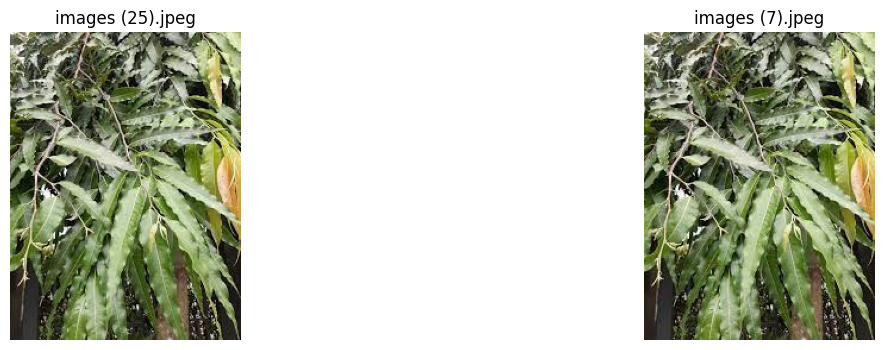

Duplicate set 2:


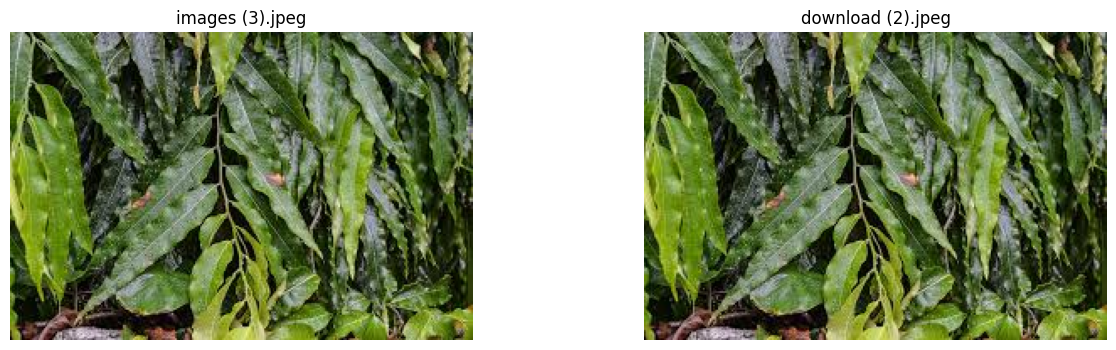

Duplicate set 3:


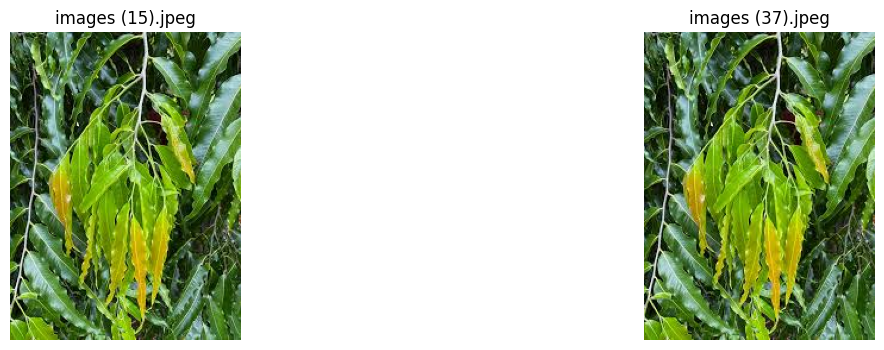

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)


In [ ]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")


✅ Removed 86 duplicate images.


In [ ]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))


🔁 Duplicates remaining: 0


In [ ]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")


🔻 Very small images: 20
🔺 Very large images: 40


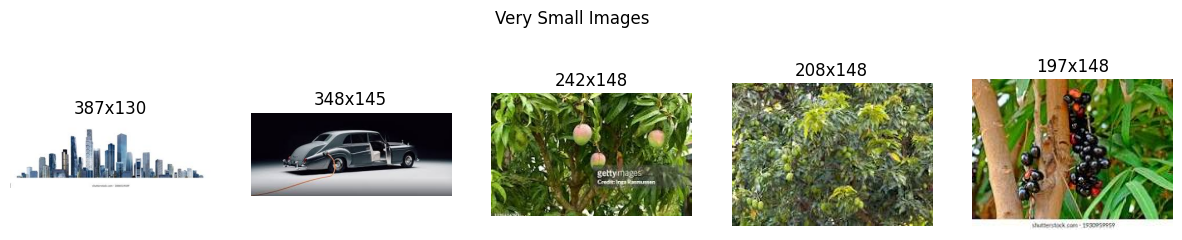

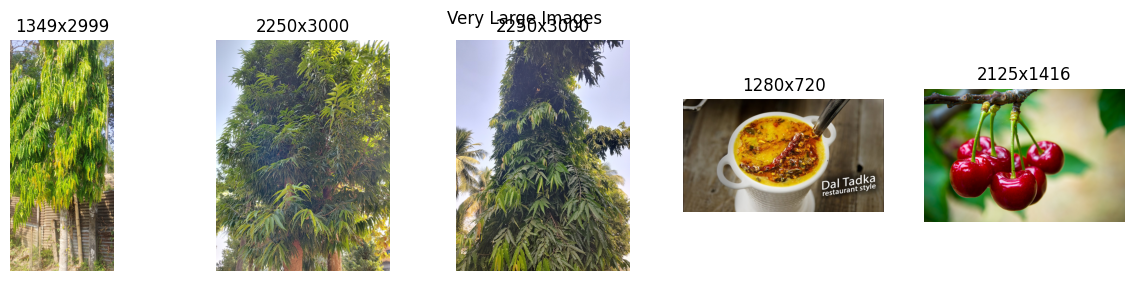

In [ ]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")


In [ ]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")


🗑️ Removed 60 outlier images (small + large).


In [ ]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())


             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,409 (16.09 MB)

 Trainable params: 167,838 (655.62 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.0609 - loss: 3.4523 - val_accuracy: 0.0903 - val_loss: 3.3816
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.0845 - loss: 3.3894 - val_accuracy: 0.0903 - val_loss: 3.3733
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.0854 - loss: 3.3942 - val_accuracy: 0.0903 - val_loss: 3.3797
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.0866 - loss: 3.3856 - val_accuracy: 0.0903 - val_loss: 3.3756
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.0811 - loss: 3.3893 - val_accuracy: 0.0903 - val_loss: 3.3776
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.0803 - loss: 3.3832 - val_accuracy: 0.0903 - val_loss: 3.3738
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.0903 - loss: 3.3857 - val_accuracy: 0.0903 - val_loss: 3.3715
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.0853 - loss: 3.3758 - val_accuracy: 0.0903 - v

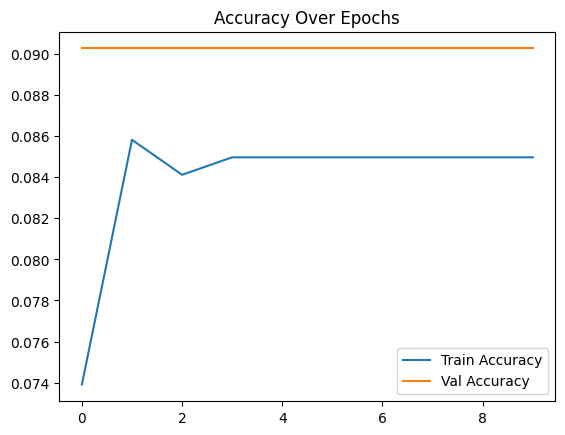

In [ ]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.0391 - loss: 4.1019 - val_accuracy: 0.0903 - val_loss: 3.3781
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.0849 - loss: 3.3560 - val_accuracy: 0.0903 - val_loss: 3.2093
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.1083 - loss: 3.2058 - val_accuracy: 0.1227 - val_loss: 3.0395
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.1324 - loss: 3.0444 - val_accuracy: 0.1769 - val_loss: 2.9371
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - accuracy: 0.1597 - loss: 2.9426 - val_accuracy: 0.1986 - val_loss: 2.7859
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.1867 - loss: 2.8813 - val_accuracy: 0.2058 - val_loss: 2.6853
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.2018 - loss: 2.8268 - val_accuracy: 0.2166 - val_loss: 2.6133
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.2327 - loss: 2.6460 - val_accuracy: 0.2635 - v

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


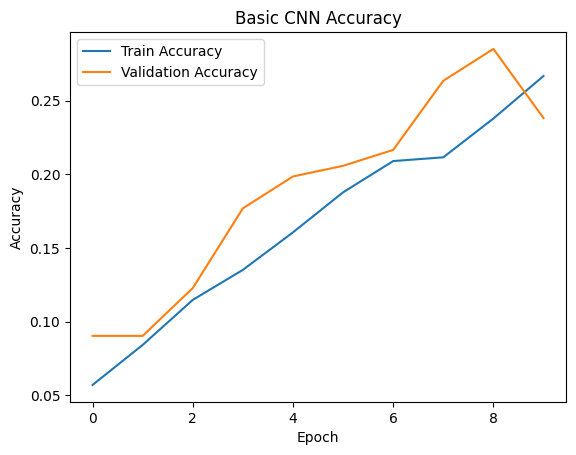

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 226s 6s/step - accuracy: 0.0704 - loss: 5.2342 - val_accuracy: 0.0325 - val_loss: 8.6479
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 207s 6s/step - accuracy: 0.1113 - loss: 3.1864 - val_accuracy: 0.0325 - val_loss: 15.9585
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 216s 6s/step - accuracy: 0.1340 - loss: 3.1465 - val_accuracy: 0.0325 - val_loss: 20.3259
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 231s 6s/step - accuracy: 0.1444 - loss: 3.0979 - val_accuracy: 0.0325 - val_loss: 22.2983
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 212s 6s/step - accuracy: 0.1737 - loss: 3.0302 - val_accuracy: 0.0397 - val_loss: 24.1010
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 210s 6s/step - accuracy: 0.1539 - loss: 3.0891 - val_accuracy: 0.0397 - val_loss: 21.4053
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 230s 6s/step - accuracy: 0.1731 - loss: 3.0331 - val_accuracy: 0.0505 - val_loss: 14.9352
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 210s 6s/step - accuracy: 0.1614 - loss: 3.0447 - val_accuracy: 0.06

In [ ]:

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)


Found 1280 images belonging to 30 classes.
Found 320 images belonging to 30 classes.


In [ ]:
# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [ ]:
print("Class indices:", train_generator.class_indices)
print("Number of classes:", num_classes)
print("Samples in training set:", train_generator.samples)
print("Samples in validation set:", val_generator.samples)


Class indices: {'amla': 0, 'asopalav': 1, 'babul': 2, 'bamboo': 3, 'banyan': 4, 'bili': 5, 'cactus': 6, 'champa': 7, 'coconut': 8, 'garmalo': 9, 'gulmohor': 10, 'gunda': 11, 'jamun': 12, 'kanchan': 13, 'kesudo': 14, 'khajur': 15, 'mango': 16, 'motichanoti': 17, 'neem': 18, 'nilgiri': 19, 'other': 20, 'pilikaren': 21, 'pipal': 22, 'saptaparni': 23, 'shirish': 24, 'simlo': 25, 'sitafal': 26, 'sonmahor': 27, 'sugarcane': 28, 'vad': 29}
Number of classes: 30
Samples in training set: 1177
Samples in validation set: 277


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    'TreeSpecies/Tree_Species_Dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    'TreeSpecies/Tree_Species_Dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

base_model = MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)


Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0310 - loss: 4.0514

37/37 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.0311 - loss: 4.0491 - val_accuracy: 0.0505 - val_loss: 3.6242
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0542 - loss: 3.6674

37/37 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.0547 - loss: 3.6663 - val_accuracy: 0.1011 - val_loss: 3.3500
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0983 - loss: 3.5046

37/37 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.0985 - loss: 3.5034 - val_accuracy: 0.1552 - val_loss: 3.2132
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.1266 - loss: 3.3204 - val_accuracy: 0.1408 - val_loss: 3.0450
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1455 - loss: 3.1212

37/37 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.1458 - loss: 3.1212 - val_accuracy: 0.2094 - val_loss: 2.8621
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2009 - loss: 2.9505

37/37 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.2006 - loss: 2.9506 - val_accuracy: 0.2599 - val_loss: 2.7568
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.1868 - loss: 2.8704 - val_accuracy: 0.2563 - val_loss: 2.6829
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2367 - loss: 2.7373

37/37 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.2369 - loss: 2.7365 - val_accuracy: 0.3249 - val_loss: 2.5558
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3106 - loss: 2.5214

37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3107 - loss: 2.5205 - val_accuracy: 0.3466 - val_loss: 2.5021
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3255 - loss: 2.4328

37/37 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.3256 - loss: 2.4327 - val_accuracy: 0.3718 - val_loss: 2.3859
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3301 - loss: 2.3292

37/37 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.3302 - loss: 2.3293 - val_accuracy: 0.4007 - val_loss: 2.3291
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3502 - loss: 2.2985

37/37 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.3503 - loss: 2.2975 - val_accuracy: 0.4440 - val_loss: 2.2585
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3735 - loss: 2.2117

37/37 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.3741 - loss: 2.2106 - val_accuracy: 0.4621 - val_loss: 2.1599
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.3904 - loss: 2.1106 - val_accuracy: 0.4621 - val_loss: 2.1070
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.4288 - loss: 2.0142 - val_accuracy: 0.4332 - val_loss: 2.1049
Epoch 16/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4293 - loss: 2.0428

37/37 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.4293 - loss: 2.0428 - val_accuracy: 0.4657 - val_loss: 2.0359
Epoch 17/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4689 - loss: 1.9496

37/37 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.4691 - loss: 1.9485 - val_accuracy: 0.4946 - val_loss: 1.9789
Epoch 18/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.4735 - loss: 1.9264 - val_accuracy: 0.4946 - val_loss: 1.9583
Epoch 19/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5213 - loss: 1.7841

37/37 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5211 - loss: 1.7844 - val_accuracy: 0.5054 - val_loss: 1.9060
Epoch 20/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4915 - loss: 1.7839

37/37 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.4918 - loss: 1.7834 - val_accuracy: 0.5199 - val_loss: 1.9010


In [ ]:
print(train_generator.class_indices)

{'amla': 0, 'asopalav': 1, 'babul': 2, 'bamboo': 3, 'banyan': 4, 'bili': 5, 'cactus': 6, 'champa': 7, 'coconut': 8, 'garmalo': 9, 'gulmohor': 10, 'gunda': 11, 'jamun': 12, 'kanchan': 13, 'kesudo': 14, 'khajur': 15, 'mango': 16, 'motichanoti': 17, 'neem': 18, 'nilgiri': 19, 'other': 20, 'pilikaren': 21, 'pipal': 22, 'saptaparni': 23, 'shirish': 24, 'simlo': 25, 'sitafal': 26, 'sonmahor': 27, 'sugarcane': 28, 'vad': 29}


In [ ]:
import json

with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("best_model.h5")
model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,296,416 (8.76 MB)

 Trainable params: 38,430 (150.12 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)